/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 43)                  │         269,739 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 270,635 (1.03 MB)

 Trainable params: 270,635 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.5565 - loss: 1.7944 - val_accuracy: 0.9051 - val_loss: 0.3879
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9365 - loss: 0.2908 - val_accuracy: 0.9434 - val_loss: 0.2410
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9675 - loss: 0.1515 - val_accuracy: 0.9643 - val_loss: 0.1616
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9795 - loss: 0.0976 - val_accuracy: 0.9660 - val_loss: 0.1462
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9864 - loss: 0.0666 - val_accuracy: 0.9730 - val_loss: 0.1206
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9887 - loss: 0.0542 - val_accuracy: 0.9668 - val_loss: 0.1582
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9911 - loss: 0.0422 - val_accuracy: 0.9770 - val_loss: 0.1127
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9927 - loss: 0.0348 - 

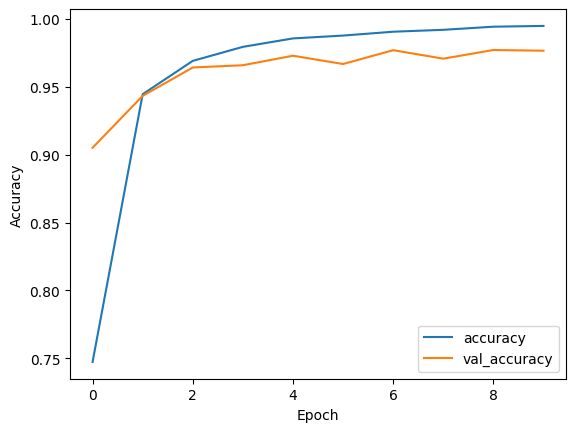

✅ Model training complete and saved as 'traffic_sign_cnn.h5'


In [1]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Dataset path in Kaggle
dataset_path = "/kaggle/input/gtsrb-german-traffic-sign/Train"

# Class labels (0 to 42) based on folder structure
CLASS_FOLDERS = [str(i) for i in range(43)]

# Function to load images from the Train directory
def load_images(base_path):
    images = []
    labels = []

    for class_id in CLASS_FOLDERS:
        class_folder = os.path.join(base_path, class_id)  # e.g., /Train/0, /Train/1 ...
        
        if not os.path.exists(class_folder):
            print(f"Warning: Class folder {class_folder} does not exist. Skipping...")
            continue  # Skip if the folder does not exist
        
        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            
            img = cv2.imread(img_path)
            if img is None:
                print(f"Warning: Could not read {img_path}")
                continue  # Skip unreadable images
            
            img = cv2.resize(img, (30, 30))  # Resize to 32x32
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            
            images.append(img)
            labels.append(int(class_id))  # Store class as integer
    
    return np.array(images), np.array(labels)

# Load training images
train_images, train_labels = load_images(dataset_path)

# Normalize images
train_images = train_images / 255.0

# Convert labels to categorical
num_classes = len(CLASS_FOLDERS)
train_labels = keras.utils.to_categorical(train_labels, num_classes)

# Split dataset into train & validation
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(43, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and train the model
input_shape = (30, 30, 3)
model = create_cnn_model(input_shape, num_classes)
model.summary()

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), batch_size=32)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the model
model.save("simple_traffic_sign_cnn.h5")

print("✅ Model training complete and saved as 'traffic_sign_cnn.h5'")

In [1]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# Load the model from .h5
loaded_model = keras.models.load_model('/kaggle/input/cnn/tensorflow2/default/1/simple_traffic_sign_cnn.h5')

# Check the model architecture
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 43)                  │         269,739 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 270,637 (1.03 MB)

 Trainable params: 270,635 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [4]:
import cv2
import numpy as np

# Load the image using OpenCV
image_path = '/kaggle/input/gtsrb-german-traffic-sign/Train/10/00010_00000_00001.png'  # Replace with your image path
image = cv2.imread(image_path)

# Resize image to 30x30
resized_image = cv2.resize(image, (30, 30))

# Convert to 8-bit integer array
image_array = np.array(resized_image, dtype=np.uint8)

# Prepare to format as a C array
c_array_string = "{\n"

# Convert each pixel to C array format
for i, row in enumerate(image_array):
    c_array_string += "    {"
    for j, pixel in enumerate(row):
        c_array_string += f"{{{pixel[0]}, {pixel[1]}, {pixel[2]}}}"
        if j < len(row) - 1:
            c_array_string += ", "
    c_array_string += "}"
    if i < len(image_array) - 1:
        c_array_string += ",\n"
c_array_string += "\n};"

print(c_array_string)

{
    {{22, 23, 22}, {24, 25, 24}, {22, 23, 23}, {20, 20, 20}, {20, 20, 20}, {23, 23, 22}, {30, 31, 35}, {29, 31, 42}, {21, 23, 43}, {28, 28, 48}, {46, 44, 56}, {69, 65, 69}, {68, 68, 66}, {68, 69, 67}, {69, 69, 68}, {68, 68, 68}, {63, 67, 66}, {62, 66, 62}, {62, 64, 63}, {60, 63, 65}, {48, 53, 65}, {24, 30, 50}, {18, 21, 46}, {31, 30, 51}, {26, 28, 43}, {17, 20, 27}, {19, 21, 22}, {23, 24, 25}, {25, 26, 27}, {23, 25, 26}},
    {{22, 24, 23}, {22, 23, 24}, {21, 21, 22}, {20, 20, 20}, {24, 23, 23}, {25, 26, 26}, {26, 29, 29}, {31, 34, 36}, {25, 30, 44}, {20, 25, 44}, {30, 31, 49}, {50, 44, 56}, {64, 62, 68}, {68, 68, 71}, {69, 68, 69}, {69, 69, 69}, {68, 69, 69}, {65, 67, 68}, {60, 62, 68}, {44, 51, 62}, {24, 31, 48}, {19, 22, 42}, {23, 24, 43}, {31, 32, 44}, {24, 25, 30}, {18, 21, 23}, {18, 20, 21}, {21, 23, 24}, {21, 24, 24}, {20, 23, 22}},
    {{22, 23, 22}, {21, 22, 22}, {20, 21, 21}, {21, 22, 21}, {27, 26, 25}, {31, 30, 30}, {25, 26, 24}, {31, 31, 28}, {35, 36, 42}, {24, 31, 44}, {

In [5]:
model = loaded_model

In [6]:
from PIL import Image
# Provide the image path manually (change this path every time)
IMAGE_PATH = "/kaggle/input/gtsrb-german-traffic-sign/Train/10/00010_00000_00001.png"  # Change this to your image

# Load and process the image
image = Image.open(IMAGE_PATH).convert("RGB")  # Open image
image = image.resize((30, 30))  # Resize to 30x30  
image = np.expand_dims(image, axis=0)  # Add batch dimension (1, 30, 30, 3)

# Make prediction
prediction = model.predict(image)
predicted_class = np.argmax(prediction)  # Get class index

print(f"🔹 Prediction: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
🔹 Prediction: 10


In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
import cv2

image = cv2.imread("/kaggle/input/gtsrb-german-traffic-sign/Train/10/00010_00000_00001.png")  # Load image
image = cv2.resize(image, (30, 30))   # Force resize to (30, 30)
#image = image / 255.0                 # Normalize
image = np.expand_dims(image, axis=0) # Add batch dimension

print("Final input shape:", image.shape)  # Debugging


# Create a new model to extract layer outputs
layer_outputs = [layer.output for layer in model.layers]
intermediate_model = Model(inputs=model.layers[0].input, outputs=layer_outputs)  # FIXED

# Run inference
intermediate_outputs = intermediate_model.predict(image)

# Print layer-wise outputs
for i, layer_output in enumerate(intermediate_outputs):
    print(f"\nLayer {i} ({model.layers[i].name}) output:\n", layer_output.flatten()[:10])  # Print first 10 values

Final input shape: (1, 30, 30, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step

Layer 0 (conv2d) output:
 [0.      0.      0.      0.      0.      0.      0.      2.20427 0.
 0.     ]

Layer 1 (max_pooling2d) output:
 [2.0091112 0.        0.        0.        0.        0.        0.
 2.20427   3.0405107 0.       ]

Layer 2 (flatten) output:
 [2.0091112 0.        0.        0.        0.        0.        0.
 2.20427   3.0405107 0.       ]

Layer 3 (dense) output:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
import pandas as pd
# Get layer outputs
intermediate_outputs = intermediate_model.predict(image)

# Save layer-wise outputs to CSV files
for i, layer_output in enumerate(intermediate_outputs):
    layer_name = model.layers[i].name
    output_flat = layer_output.flatten()  # Flatten for comparison
    pd.DataFrame(output_flat).to_csv(f"python_{layer_name}.csv", index=False, header=False)
    print(f"Saved: python_{layer_name}.csv")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Saved: python_conv2d.csv
Saved: python_max_pooling2d.csv
Saved: python_flatten.csv
Saved: python_dense.csv


In [9]:
# Get the weights as a list of numpy arrays
weights = model.get_weights()

# Print the weights of each layer
for i, w in enumerate(weights):
    print(f"Layer {i + 1} weights shape: {w.shape}")
    print(w)

Layer 1 weights shape: (3, 3, 3, 32)
[[[[-2.50275224e-01  9.28089675e-03 -1.62956983e-01 -2.28816181e-01
     3.75598401e-01  3.60639095e-02  1.01372845e-01  2.70324256e-02
     2.40675867e-01  4.85055566e-01  1.53016940e-01 -3.49328518e-01
     3.47639948e-01 -1.25622317e-01 -6.37556970e-01 -4.30117130e-01
     4.22642589e-01 -3.60418141e-01  3.84455860e-01  4.35350150e-01
    -1.43330067e-01  5.35337115e-03 -1.47482395e-01  4.00898159e-01
     1.31196693e-01  3.72282982e-01  1.40962049e-01 -3.05564459e-02
    -1.28750309e-01  3.94934028e-01 -5.70510983e-01 -1.52394742e-01]
   [-7.17441440e-02  1.14483841e-01 -1.30633563e-01  1.62135676e-01
    -3.92650999e-02 -3.03826630e-01  2.93619931e-01 -7.51201110e-03
    -1.94364991e-02  2.27345407e-01  2.25970879e-01 -3.69817577e-02
     2.00296491e-01 -2.59969562e-01 -3.64096075e-01 -5.63195467e-01
     5.49068213e-01 -1.06553346e-01  5.63276172e-01  5.02009869e-01
    -1.17081530e-01 -2.39742901e-02 -4.21923429e-01 -3.04498553e-01
     1.569

In [11]:
import csv
# Extract weights and biases
weights_dict = {}
for layer in model.layers:
    if len(layer.get_weights()) > 0:  # Only layers with weights
        weights, biases = layer.get_weights()
        weights_dict[layer.name + "_weights"] = weights
        weights_dict[layer.name + "_biases"] = biases

# Save to CSV
csv_filename = "cnn_weights.csv"
with open(csv_filename, mode="w", newline="") as file:
    writer = csv.writer(file)
    
    # Write headers
    headers = list(weights_dict.keys())
    writer.writerow(headers)
    
    # Write rows (pad shorter lists with empty values)
    max_len = max(len(v.flatten()) for v in weights_dict.values())
    for i in range(max_len):
        row = [weights_dict[key].flatten()[i] if i < len(weights_dict[key].flatten()) else "" for key in headers]
        writer.writerow(row)

print(f"Weights saved to {csv_filename}")

# Convert weights to C array with proper shape
c_array_filename = "cnn_weights.h"
with open(c_array_filename, "w") as f:
    f.write("#ifndef CNN_WEIGHTS_H\n#define CNN_WEIGHTS_H\n\n")
    for i, (layer_name, w) in enumerate(weights_dict.items()):
        shape_str = " ".join(map(str, w.shape))
        shape_c = "".join([f"[{dim}]" for dim in w.shape])
        f.write(f"// {layer_name} weights, shape: {shape_str}\n")
        f.write(f"const float {layer_name}{shape_c} = {{\n")
        f.write(",\n".join(
            ["{ " + ", ".join(map(str, row.flatten())) + " }" for row in w.reshape(-1, w.shape[-1])]
        ))
        f.write("\n};\n\n")
    f.write("#endif // CNN_WEIGHTS_H\n")

print(f"C array saved to {c_array_filename}")

Weights saved to cnn_weights.csv
C array saved to cnn_weights.h


In [11]:
from PIL import Image
# Provide the image path manually (change this path every time)
IMAGE_PATH = "/kaggle/input/gtsrb-german-traffic-sign/Train/0/00000_00000_00000.png"  # Change this to your image

# Load and process the image
image = Image.open(IMAGE_PATH).convert("RGB")  # Open image
image = image.resize((30, 30))  # Resize to 30x30  
image = np.expand_dims(image, axis=0)  # Add batch dimension (1, 30, 30, 3)

# Make prediction
prediction = model.predict(image)
predicted_class = np.argmax(prediction)  # Get class index

print(f"🔹 Prediction: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
🔹 Prediction: 0


In [12]:
import cv2
import numpy as np

# Load the image using OpenCV
image_path = '/kaggle/input/gtsrb-german-traffic-sign/Train/0/00000_00000_00000.png'  # Replace with your image path
image = cv2.imread(image_path)

# Resize image to 30x30
resized_image = cv2.resize(image, (30, 30))

# Convert to 8-bit integer array
image_array = np.array(resized_image, dtype=np.uint8)

# Prepare to format as a C array
c_array_string = "{\n"

# Convert each pixel to C array format
for i, row in enumerate(image_array):
    c_array_string += "    {"
    for j, pixel in enumerate(row):
        c_array_string += f"{{{pixel[0]}, {pixel[1]}, {pixel[2]}}}"
        if j < len(row) - 1:
            c_array_string += ", "
    c_array_string += "}"
    if i < len(image_array) - 1:
        c_array_string += ",\n"
c_array_string += "\n};"

print(c_array_string)

{
    {{80, 78, 75}, {78, 76, 74}, {83, 86, 85}, {85, 93, 105}, {110, 113, 140}, {114, 111, 158}, {119, 119, 186}, {128, 130, 181}, {200, 199, 224}, {246, 242, 251}, {255, 242, 247}, {255, 236, 235}, {221, 191, 183}, {184, 148, 130}, {175, 152, 123}, {181, 182, 158}, {207, 215, 208}, {242, 236, 242}, {246, 233, 245}, {213, 202, 229}, {158, 151, 211}, {99, 97, 177}, {70, 71, 139}, {91, 85, 139}, {107, 97, 120}, {94, 89, 87}, {79, 79, 74}, {74, 74, 68}, {68, 69, 65}, {66, 67, 66}},
    {{86, 84, 83}, {82, 80, 80}, {84, 88, 89}, {94, 105, 131}, {119, 129, 182}, {89, 97, 160}, {88, 86, 155}, {162, 147, 194}, {235, 226, 241}, {255, 250, 254}, {255, 252, 250}, {246, 215, 211}, {206, 155, 151}, {197, 143, 140}, {190, 165, 164}, {156, 188, 187}, {167, 213, 209}, {223, 232, 229}, {253, 237, 242}, {250, 225, 245}, {209, 184, 231}, {120, 120, 187}, {68, 81, 148}, {89, 81, 143}, {115, 91, 125}, {104, 90, 100}, {85, 81, 83}, {78, 77, 73}, {75, 78, 76}, {78, 80, 80}},
    {{80, 78, 78}, {86, 85, 86}